In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import itertools

from matplotlib import dates
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df_scc = pd.read_csv("datas/scc_fluctuation.csv", encoding="cp949")

In [3]:
df_scc.head()

,2.82,000210,2019-08-20,2019-08-20.1
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [4]:
df_scc.columns =["fluctuation", "ticker", "reception_date", "registration_date"]
df_scc.head()

,fluctuation,ticker,reception_date,registration_date
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [5]:
df_scc = df_scc.drop(['reception_date', 'ticker'], axis= 'columns')
df_scc.head()

,fluctuation,registration_date
0,29.60,2019-08-20
1,1.50,2019-08-20
2,0.00,2019-08-21
3,3.78,2019-08-21
4,0.37,2019-08-22


In [6]:
df_scc['Datetime'] = pd.to_datetime(df_scc['registration_date'])

In [8]:
df_scc['Year'] = df_scc['Datetime'].dt.year
df_scc['Month'] = df_scc['Datetime'].dt.month
df_scc['Week'] = df_scc['Datetime'].dt.isocalendar().week
df_scc['Dat_of_week'] = df_scc['Datetime'].dt.day_name()

In [9]:
df_scc

,fluctuation,registration_date,Datetime,Year,Month,Week,Dat_of_week
0,29.60,2019-08-20,2019-08-20,2019,8,34,Tuesday
1,1.50,2019-08-20,2019-08-20,2019,8,34,Tuesday
2,0.00,2019-08-21,2019-08-21,2019,8,34,Wednesday
3,3.78,2019-08-21,2019-08-21,2019,8,34,Wednesday
4,0.37,2019-08-22,2019-08-22,2019,8,34,Thursday
...,...,...,...,...,...,...,...
4155,-1.62,2022-08-18,2022-08-18,2022,8,33,Thursday
4156,0.00,2022-08-18,2022-08-18,2022,8,33,Thursday
4157,-0.68,2022-08-19,2022-08-19,2022,8,33,Friday
4158,-0.49,2022-08-19,2022-08-19,2022,8,33,Friday


Week = 34 --> 해당 날짜가 2019년에서 34주차라는 뜻

###### 날짜별 등락률의 합계를 시계열로 보기위해 pivot_table을 생성함.

In [11]:
pivot = pd.pivot_table(data=df_scc, index='Datetime', values='fluctuation', aggfunc='sum').reset_index()
pltpivot

,Datetime,fluctuation
0,2019-08-20,31.10
1,2019-08-21,3.78
2,2019-08-22,-12.19
3,2019-08-23,-4.03
4,2019-08-26,-5.65
...,...,...
719,2022-08-12,-1.37
720,2022-08-16,1.29
721,2022-08-17,-16.19
722,2022-08-18,4.12


In [14]:
pivot.describe()

,fluctuation
count,724.000000
mean,4.936367
std,15.729346
min,-81.180000
25%,-1.885000
50%,3.055000
75%,10.115000
max,182.870000


Text(0, 0.5, 'fluctuation')

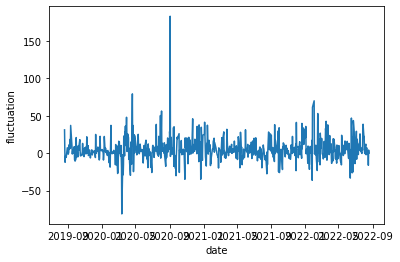

In [15]:
plt.plot(pivot['Datetime'], pivot['fluctuation'])
plt.xlabel('date')
plt.ylabel('fluctuation')

(array([18140., 18262., 18383., 18506., 18628., 18748., 18871., 18993.,
        19113., 19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

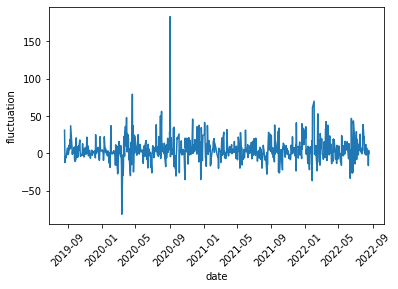

In [16]:
plt.plot(pivot['Datetime'], pivot['fluctuation'])
plt.xlabel('date')
plt.ylabel('fluctuation')
plt.xticks(rotation=45)

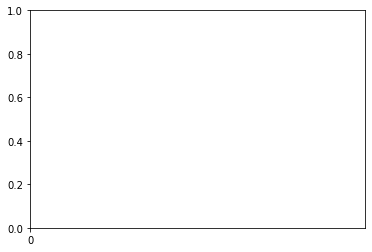

In [21]:
modify_pivot = plt.gca()
modify_pivot.xaxis.set_major_locator(dates.MonthLocator())
plt.show()

### line plot으로 나타내기

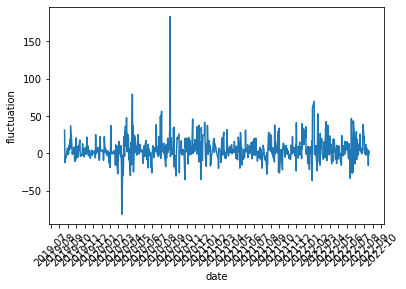

<Figure size 3600x720 with 0 Axes>

In [28]:
plt.plot(pivot['Datetime'], pivot['fluctuation'])
plt.xlabel('date')
plt.ylabel('fluctuation')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator())
plt.figure(figsize=(50,10))
plt.show()

In [29]:
df_time = pd.pivot_table(data=df_scc, index="Datetime", values="fluctuation", aggfunc="sum").reset_index(
)
df_time.set_index('Datetime')

,fluctuation
Datetime,
2019-08-20,31.10
2019-08-21,3.78
2019-08-22,-12.19
2019-08-23,-4.03
2019-08-26,-5.65
...,...
2022-08-12,-1.37
2022-08-16,1.29
2022-08-17,-16.19


In [40]:
df_time["fluctuation"] = df_time["fluctuation"].astype(str)
df_time.dtypes

Datetime       datetime64[ns]
fluctuation            object
dtype: object

In [46]:
model_series = seasonal_decompose(df_time, model="additive")
fig = model_series.plot()
plt.show()

ValueError: could not convert string to float: '2019-08-20'

In [47]:
df_time.head()

,Datetime,fluctuation
0,2019-08-20,31.1
1,2019-08-21,3.78
2,2019-08-22,-12.19
3,2019-08-23,-4.029999999999999
4,2019-08-26,-5.6499999999999995


In [50]:
df_time["fluctuation"] = df_time["fluctuation"].astype(float)
df_time.dtypes

Datetime        object
fluctuation    float64
dtype: object

In [51]:
model_series = seasonal_decompose(df_time, model="additive")
fig = model_series.plot()
plt.show()

ValueError: could not convert string to float: '2019-08-20'

In [52]:
df_time["Datetime"] = pd.to_datetime(df_time["Datetime"])
df_time.dtypes

Datetime       datetime64[ns]
fluctuation           float64
dtype: object

In [53]:
# 시계열 형태의 ts 데이터 만들기
df_time.index = df_time.Datetime
df_time.head()

,Datetime,fluctuation
Datetime,,
2019-08-20,2019-08-20,31.10
2019-08-21,2019-08-21,3.78
2019-08-22,2019-08-22,-12.19
2019-08-23,2019-08-23,-4.03
2019-08-26,2019-08-26,-5.65


In [55]:
df_time = df_time.drop("Datetime", axis=1)
df_time.head()

,fluctuation
Datetime,
2019-08-20,31.10
2019-08-21,3.78
2019-08-22,-12.19
2019-08-23,-4.03
2019-08-26,-5.65


<Figure size 432x288 with 0 Axes>

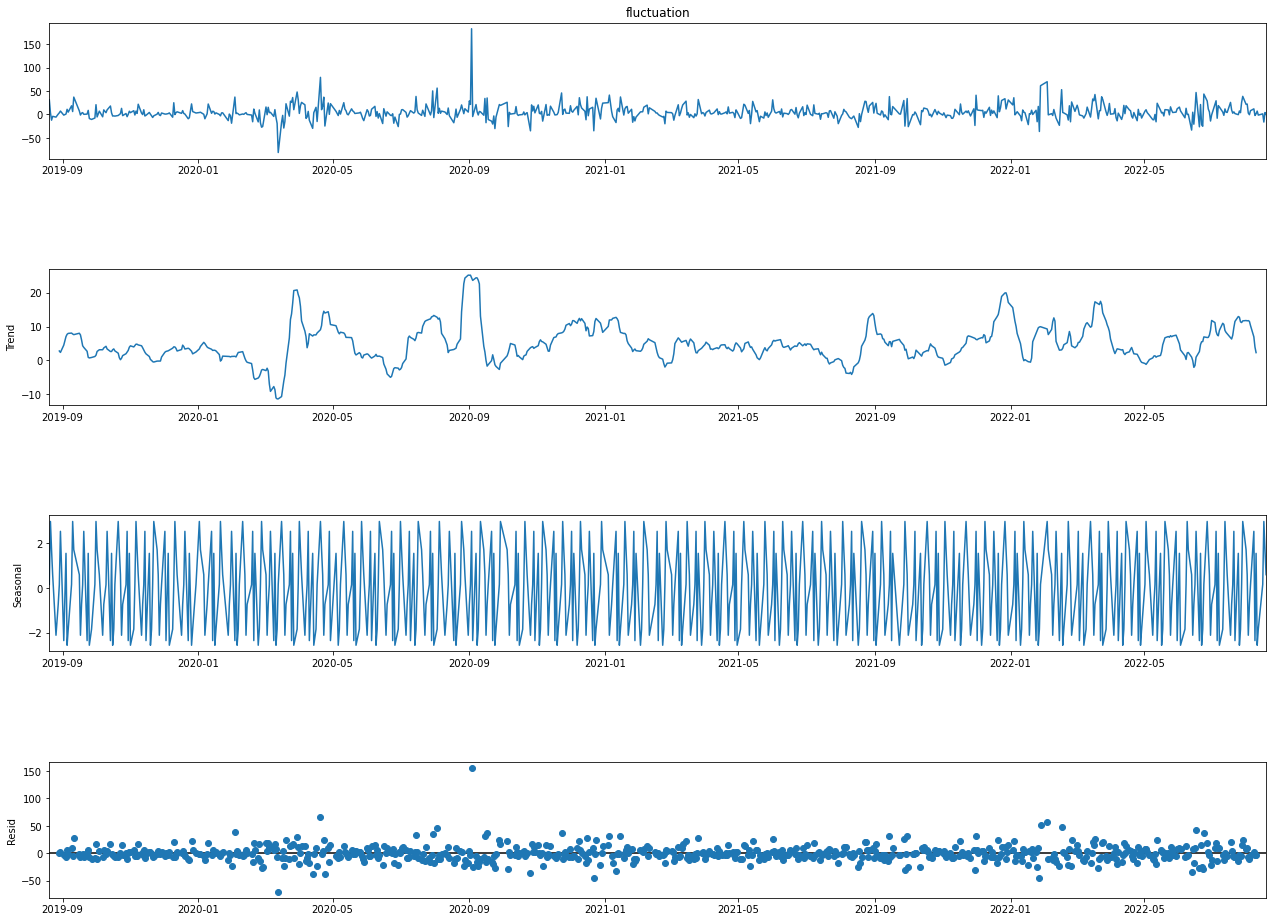

In [74]:
result = seasonal_decompose(df_time["fluctuation"], model="additive", period = 12)

fig = plt.figure()
fig = result.plot()

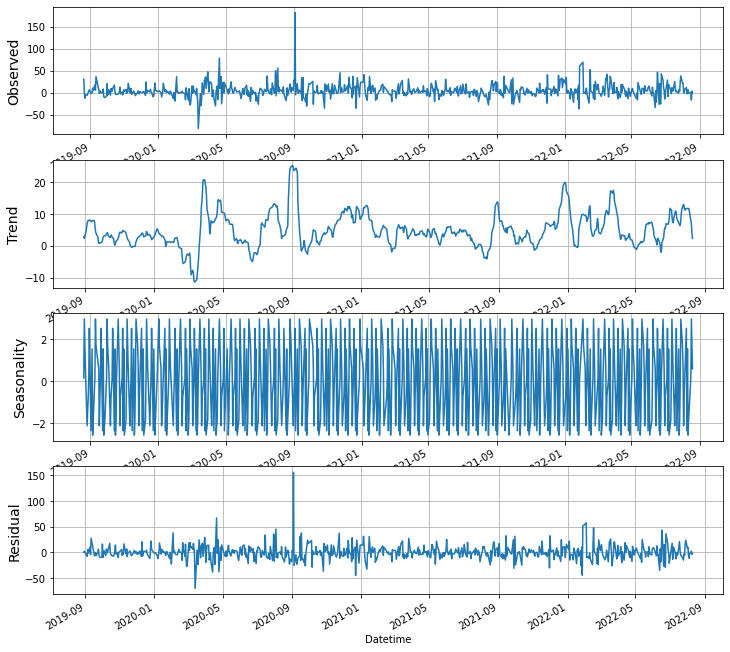

In [89]:
# ground truth & timeseries decompostion all together# -- observed data

plt.figure(figsize=(12,12))
plt.subplot(4,1,1)
result.observed.plot()
plt.grid(True)
plt.ylabel('Observed', fontsize=14)

# -- trend & cycle factor
plt.subplot(4, 1, 2)
result.trend.plot()
# df_time.trend_cycle.plot()
plt.grid(True)
plt.ylabel('Trend', fontsize=14)

# -- seasonal factor
plt.subplot(4, 1, 3)
result.seasonal.plot()
# df_time.seasonal.plot()
plt.grid(True)
plt.ylabel('Seasonality', fontsize=14)

# -- irregular factor (noise)
plt.subplot(4, 1, 4)
result.resid.plot()
# df_time.irregular.plot()
plt.grid(True)
plt.ylabel('Residual', fontsize=14)

plt.show()


In [90]:
result.observed

Datetime
2019-08-20    31.10
2019-08-21     3.78
2019-08-22   -12.19
2019-08-23    -4.03
2019-08-26    -5.65
              ...  
2022-08-12    -1.37
2022-08-16     1.29
2022-08-17   -16.19
2022-08-18     4.12
2022-08-19     0.05
Name: fluctuation, Length: 724, dtype: float64

In [91]:
result.trend

Datetime
2019-08-20   NaN
2019-08-21   NaN
2019-08-22   NaN
2019-08-23   NaN
2019-08-26   NaN
              ..
2022-08-12   NaN
2022-08-16   NaN
2022-08-17   NaN
2022-08-18   NaN
2022-08-19   NaN
Name: trend, Length: 724, dtype: float64

In [92]:
result.seasonal

Datetime
2019-08-20    0.156110
2019-08-21    2.953088
2019-08-22    1.696202
2019-08-23    0.586336
2019-08-26   -2.107654
                ...   
2022-08-12   -1.837823
2022-08-16    0.156110
2022-08-17    2.953088
2022-08-18    1.696202
2022-08-19    0.586336
Name: seasonal, Length: 724, dtype: float64

## 계절성 분석에 따라 투자하기 좋은 달은 4, 8, 11 월이다.